# Summary Statistics for Fake News Dataset

**Dataset :** [https://www.kaggle.com/c/fake-news/data](https://www.kaggle.com/c/fake-news/data)

In this file, we'd explore the Fake News dataset available on Kaggle. Each code block of this document would be preceded by a markdown cell that explains analysis.

The ```train.csv``` file contains **20,242** pairs of headlines and articles (after dropping NA), along with information on the author and a label column which tells us whether the news item is reliable or not. In this section we'll analyse the ```train.csv``` file on the following characteristics.


## Contents:
1. Files and structure
2. Count by Label
3. Title Analysis
    - Word Count
    - Histograms
    - Hypothesis Testng
    - Word Cloud
4. Text Anlaysis
    - Word Count
    - Histograms
    - Hypothesis Testng
    - Word Cloud
5. Topic Analysis
    - Topical Distribution
    - Distribution of Reliability Across Topics
6. Sentiment Analysis
    - Headlines
    - Text

## 1. Files and Structure

1. ```train.csv``` : id, title, author, text, label
2. ```topic_labels.csv``` : id, topic_label

In this code file, we'll look at the ```train.csv``` file for analysis.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from IPython.display import Image as Im

from textblob import TextBlob

In [3]:
# specifcy path to datafiles (extracted dataset from provided link)
path_to_data_files = './'

# submit = pd.read_csv(path_to_data_files+'submit.csv')
# test = pd.read_csv(path_to_data_files+'test.csv')
train = pd.read_csv(path_to_data_files+'train.csv')
train = train[train['title'].notna()] # drop empty title rows
train = train[train['text'].notna()] # drop empty text rows
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20203 entries, 0 to 20799
Data columns (total 5 columns):
id        20203 non-null int64
title     20203 non-null object
author    18285 non-null object
text      20203 non-null object
label     20203 non-null int64
dtypes: int64(2), object(3)
memory usage: 947.0+ KB
None


**id** : id for headline and text pair  
**title** : headline  
**author** : author of the article  
**text** : text of the post  
**label** : classification as *reliable* or *unreliable*

## 2. Count by Label

In [4]:
temp = train.groupby(train['label']).count()
label0 = train.loc[train['label'] == 0]
label1 = train.loc[train['label'] == 1]

In [4]:
print(temp)
print("\nLabelled as 'RELIABLE'   : ",temp.loc[0]['id'])
print("Labelled as 'UNRELIABLE' : ",temp.loc[1]['id'])

          id  title  author   text
label                             
0      10387  10387   10361  10387
1       9816   9816    7924   9816

Labelled as 'RELIABLE'   :  10387
Labelled as 'UNRELIABLE' :  9816


## 3. Title Analysis

In [5]:
# defining statistics for all titles
titles = train['title'].tolist()
length_of_titles = [len(i.split()) for i in titles]
mean = np.mean(length_of_titles)
median = np.median(length_of_titles)
std_dev = np.std(length_of_titles)
_,p = stats.normaltest(length_of_titles)

# defining statistics for all reliable titles
titles0 = label0['title'].tolist()
length_of_titles0 = [len(i.split()) for i in titles0]
mean0 = np.mean(length_of_titles0)
median0 = np.median(length_of_titles0)
std_dev0 = np.std(length_of_titles0)
_,p0 = stats.normaltest(length_of_titles0)

# defining statistics for all unreliable titles
titles1 = label1['title'].tolist()
length_of_titles1 = [len(i.split()) for i in titles1]
mean1 = np.mean(length_of_titles1)
median1 = np.median(length_of_titles1)
std_dev1 = np.std(length_of_titles1)
_,p1 = stats.normaltest(length_of_titles1)

In [6]:
print("------------------------------------------")
print(" ** STATISTICS FOR ALL TITLE WORD COUNT **")
print("------------------------------------------\n")
print("Mean           : ", mean)
print("Median         : ", median)
print("Std. Deviation : ", std_dev)
print("Normalcy p     : ", p)
print("----------------------------------------\n")

print("-----------------------------------------------")
print(" ** STATISTICS FOR RELIABLE TITLE WORD COUNT **")
print("-----------------------------------------------\n")
print("Mean           : ", mean0)
print("Median         : ", median0)
print("Std. Deviation : ", std_dev0)
print("Normalcy p     : ", p0)
print("-----------------------------------------------\n")

print("------------------------------------------------")
print("** STATISTICS FOR UNRELIABLE TITLE WORD COUNT **")
print("------------------------------------------------\n")
print("Mean           : ", mean1)
print("Median         : ", median1)
print("Std. Deviation : ", std_dev1)
print("Normalcy p     : ", p1)
print("-----------------------------------------------\n")

------------------------------------------
 ** STATISTICS FOR ALL TITLE WORD COUNT **
------------------------------------------

Mean           :  12.412067514725535
Median         :  13.0
Std. Deviation :  4.093536724086439
Normalcy p     :  0.0
----------------------------------------

-----------------------------------------------
 ** STATISTICS FOR RELIABLE TITLE WORD COUNT **
-----------------------------------------------

Mean           :  13.665928564551844
Median         :  14.0
Std. Deviation :  2.9147043265411483
Normalcy p     :  3.882247759464188e-15
-----------------------------------------------

------------------------------------------------
** STATISTICS FOR UNRELIABLE TITLE WORD COUNT **
------------------------------------------------

Mean           :  11.085268948655257
Median         :  11.0
Std. Deviation :  4.698419486307381
Normalcy p     :  0.0
-----------------------------------------------



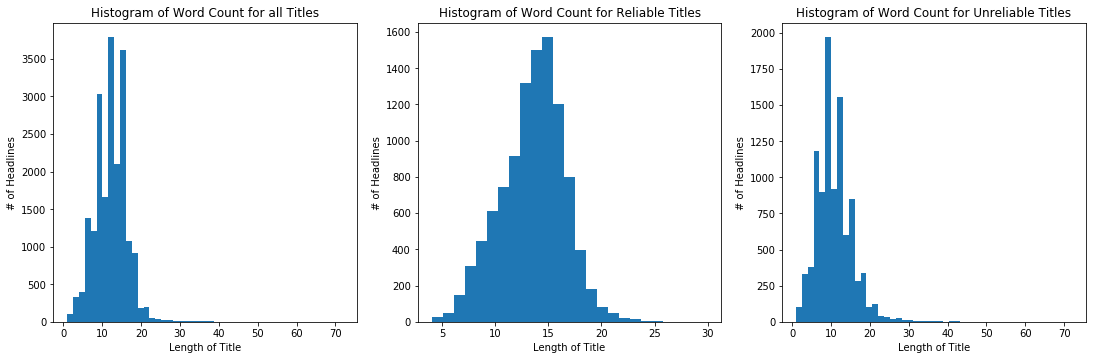

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 5.5)
plt.subplot(1,3,1)
plt.hist(length_of_titles, density=False, bins=len(set(length_of_titles)))
plt.ylabel('# of Headlines')
plt.xlabel('Length of Title')
plt.title("Histogram of Word Count for all Titles")

plt.subplot(1,3,2)
plt.hist(length_of_titles0, density=False, bins=len(set(length_of_titles0)))
plt.ylabel('# of Headlines')
plt.xlabel('Length of Title')
plt.title("Histogram of Word Count for Reliable Titles")

plt.subplot(1,3,3)
plt.hist(length_of_titles1, density=False, bins=len(set(length_of_titles1)))
plt.ylabel('# of Headlines')
plt.xlabel('Length of Title')
plt.title("Histogram of Word Count for Unreliable Titles")
plt.show()

 **Q.** *Are reliable news healdines longer than unreliable news headlines?*  
 **ANS.** YES.

In [8]:
_,p=stats.mannwhitneyu(length_of_titles0, length_of_titles1, alternative='greater')
print("p value as per Mann-Whitney test was ", p)

p value as per Mann-Whitney test was  0.0


### Title Word Cloud

The following code is to generate a word cloud for all the headlines in our dataset.

In [9]:
word_cloud_string = " "
for i in titles:
    word_cloud_string = word_cloud_string + str(i) + " " 
word_cloud_string = word_cloud_string.lower()

word_cloud_string0 = " "
for i in titles0:
    word_cloud_string0 = word_cloud_string0 + str(i) + " " 
word_cloud_string0 = word_cloud_string0.lower()

word_cloud_string1 = " "
for i in titles1:
    word_cloud_string1 = word_cloud_string1 + str(i) + " " 
word_cloud_string1 = word_cloud_string1.lower()

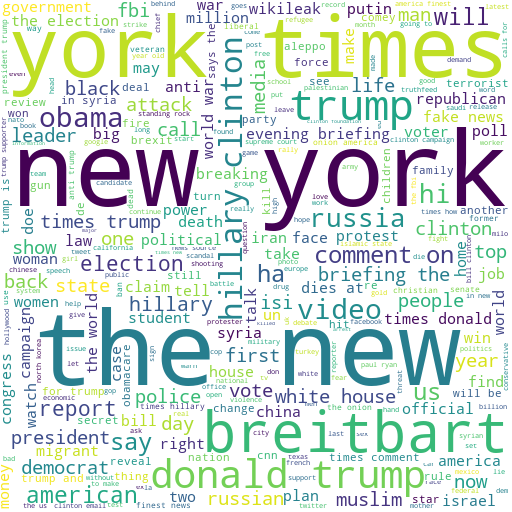

In [10]:
maskArray = np.array(Image.open("img/cloud.png"))
cloud = WordCloud(background_color = "white", \
                  max_words = 300, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(word_cloud_string)
cloud.to_file("img/title_wc_all.png")
Im(filename='img/title_wc_all.png') 

**Fig :** Wordcloud for all headlines

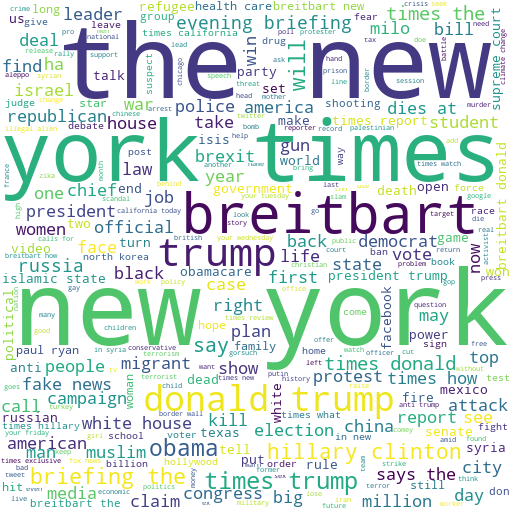

In [11]:
maskArray = np.array(Image.open("img/cloud.png"))
cloud = WordCloud(background_color = "white", \
                  max_words = 300, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(word_cloud_string0)
cloud.to_file("img/title_wc_0.png")
Im(filename='img/title_wc_0.png') 

**Fig :** Wordcloud for RELIABLE headlines

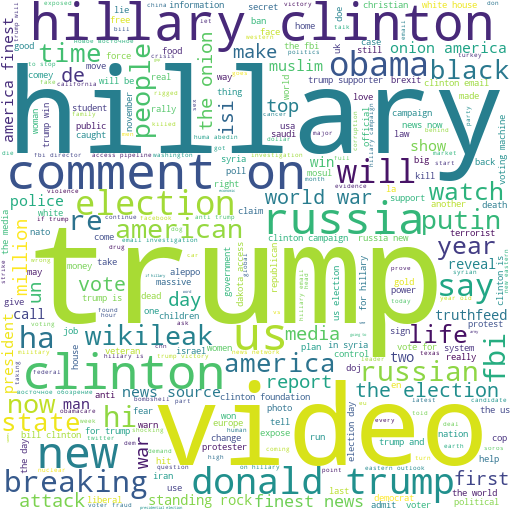

In [12]:
maskArray = np.array(Image.open("img/cloud.png"))
cloud = WordCloud(background_color = "white", \
                  max_words = 300, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(word_cloud_string1)
cloud.to_file("img/title_wc_1.png")
Im(filename='img/title_wc_1.png') 

**Fig :** Wordcloud for UNRELIABLE headlines

## 4. Text Analysis

In [6]:
# defining statistics for all text
texts = train['text'].tolist()
length_of_texts = [len(i.split()) for i in texts]
texts_mean = np.mean(length_of_texts)
texts_median = np.median(length_of_texts)
texts_std_dev = np.std(length_of_texts)
_,texts_p = stats.normaltest(length_of_texts)

# defining statistics for all reliable titles
texts0 = label0['text'].tolist()
length_of_texts0 = [len(i.split()) for i in texts0]
texts_mean0 = np.mean(length_of_texts0)
texts_median0 = np.median(length_of_texts0)
texts_std_dev0 = np.std(length_of_texts0)
_,texts_p0 = stats.normaltest(length_of_texts0)

# defining statistics for all unreliable titles
texts1 = label1['text'].tolist()
length_of_texts1 = [len(i.split()) for i in texts1]
texts_mean1 = np.mean(length_of_texts1)
texts_median1 = np.median(length_of_texts1)
texts_std_dev1 = np.std(length_of_texts1)
_,texts_p1 = stats.normaltest(length_of_texts1)

In [13]:
print("------------------------------------------")
print(" ** STATISTICS FOR ALL TEXTS WORD COUNT **")
print("------------------------------------------\n")
print("Mean           : ", texts_mean)
print("Median         : ", texts_median)
print("Std. Deviation : ", texts_std_dev)
print("Normalcy p     : ", texts_p)
print("------------------------------------------\n")

print("-----------------------------------------------")
print(" ** STATISTICS FOR RELIABLE TEXTS WORD COUNT **")
print("-----------------------------------------------\n")
print("Mean           : ", texts_mean0)
print("Median         : ", texts_median0)
print("Std. Deviation : ", texts_std_dev0)
print("Normalcy p     : ", texts_p0)
print("-----------------------------------------------\n")

print("-------------------------------------------------")
print(" ** STATISTICS FOR UNRELIABLE TEXTS WORD COUNT **")
print("-------------------------------------------------\n")
print("Mean           : ", texts_mean1)
print("Median         : ", texts_median1)
print("Std. Deviation : ", texts_std_dev1)
print("Normalcy p     : ", texts_p1)
print("-------------------------------------------------\n")

------------------------------------------
 ** STATISTICS FOR ALL TEXTS WORD COUNT **
------------------------------------------

Mean           :  779.5399693114884
Median         :  578.0
Std. Deviation :  873.3093196971276
Normalcy p     :  0.0
------------------------------------------

-----------------------------------------------
 ** STATISTICS FOR RELIABLE TEXTS WORD COUNT **
-----------------------------------------------

Mean           :  878.9965341292
Median         :  773.0
Std. Deviation :  739.33989575513
Normalcy p     :  0.0
-----------------------------------------------

-------------------------------------------------
 ** STATISTICS FOR UNRELIABLE TEXTS WORD COUNT **
-------------------------------------------------

Mean           :  674.2979828850856
Median         :  412.0
Std. Deviation :  984.753482808272
Normalcy p     :  0.0
-------------------------------------------------



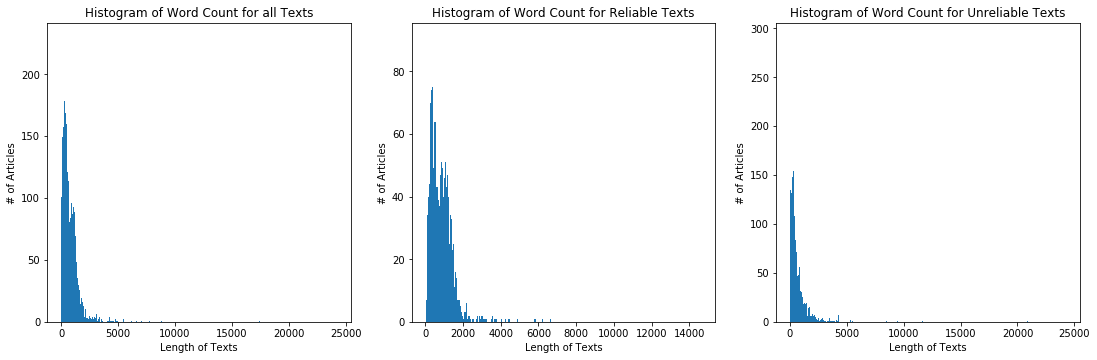

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 5.5)
plt.subplot(1,3,1)
plt.hist(length_of_texts, density=False, bins=len(set(length_of_texts)))
plt.ylabel('# of Articles')
plt.xlabel('Length of Texts')
plt.title("Histogram of Word Count for all Texts")

plt.subplot(1,3,2)
plt.hist(length_of_texts0, density=False, bins=len(set(length_of_texts0)))
plt.ylabel('# of Articles')
plt.xlabel('Length of Texts')
plt.title("Histogram of Word Count for Reliable Texts")

plt.subplot(1,3,3)
plt.hist(length_of_texts1, density=False, bins=len(set(length_of_texts1)))
plt.ylabel('# of Articles')
plt.xlabel('Length of Texts')
plt.title("Histogram of Word Count for Unreliable Texts")
plt.show()

 **Q.** *Are reliable news healdines longer than unreliable news headlines?*  
 **ANS.** YES.

In [15]:
_,p=stats.mannwhitneyu(length_of_texts0, length_of_texts1, alternative='greater')
print("p value as per Mann-Whitney test was ", p)

p value as per Mann-Whitney test was  0.0


### Texts Word Cloud

The following code is to generate a word cloud for all the headlines in our dataset.

In [17]:
texts_word_cloud_string = " "
for i in texts:
    texts_word_cloud_string = texts_word_cloud_string + str(i) + " " 
texts_word_cloud_string = texts_word_cloud_string.lower()

texts_word_cloud_string0 = " "
for i in texts0:
    texts_word_cloud_string0 = texts_word_cloud_string0 + str(i) + " " 
texts_word_cloud_string0 = texts_word_cloud_string0.lower()

texts_word_cloud_string1 = " "
for i in texts1:
    texts_word_cloud_string1 = texts_word_cloud_string1 + str(i) + " " 
texts_word_cloud_string1 = texts_word_cloud_string1.lower()

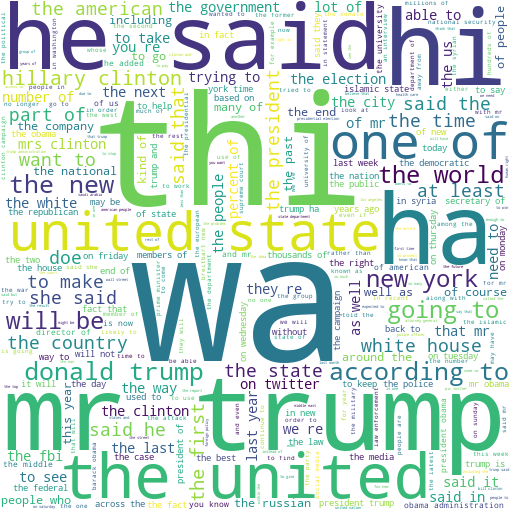

In [18]:
maskArray = np.array(Image.open("img/cloud.png"))
cloud = WordCloud(background_color = "white", \
                  max_words = 300, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(texts_word_cloud_string)
cloud.to_file("img/text_wc_all.png")
Im(filename='img/text_wc_all.png') 

**Fig :** Wordcloud for all headlines

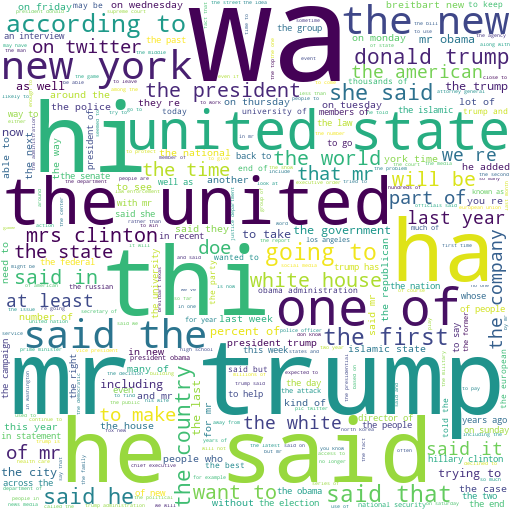

In [19]:
maskArray = np.array(Image.open("img/cloud.png"))
cloud = WordCloud(background_color = "white", \
                  max_words = 300, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(texts_word_cloud_string0)
cloud.to_file("img/text_wc_0.png")
Im(filename='img/text_wc_0.png') 

**Fig :** Wordcloud for RELIABLE headlines

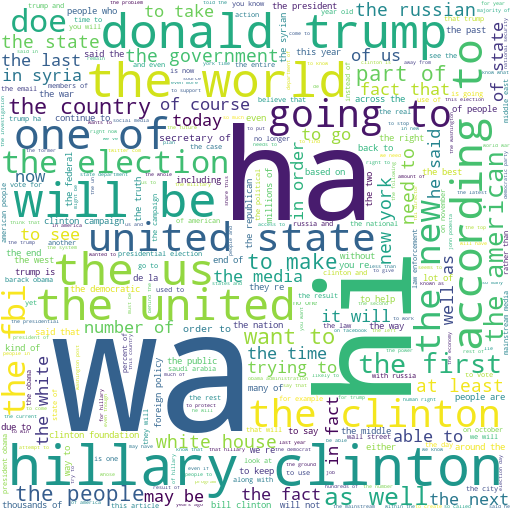

In [20]:
maskArray = np.array(Image.open("img/cloud.png"))
cloud = WordCloud(background_color = "white", \
                  max_words = 300, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(texts_word_cloud_string1)
cloud.to_file("img/text_wc_1.png")
Im(filename='img/text_wc_1.png') 

**Fig :** Wordcloud for UNRELIABLE headlines

## 5. Topic Analysis

A deep learning model was trained on the BBC's topic dataset and was run on this kaggle fake news dataset to generate topics for each article. All article are clustered in 6 labels:
1. Business
2. Entertainment
3. Politics
4. Sports
5. Technology
6. Miscellaneous

In [16]:
# get data
labels = pd.read_csv('topic_labels.csv')

### Topical Distribution
1. For All News
2. For Reliable News
3. For Unreliable News

Roughly equal distribution across reliable and unreliable news.

In [42]:
def label_count(df):
    bus = 0
    ent = 0
    pol = 0
    spo = 0
    tec = 0
    mis = 0
    total = 0
    for i in range(0,labels.shape[0]):
        if labels.iloc[i]['id'] in df['id']:
            if labels.iloc[i]['label'] == 'business':
                bus+=1
            elif labels.iloc[i]['label'] == 'entertainment':
                ent+=1
            elif labels.iloc[i]['label'] == 'politics':
                pol+=1
            elif labels.iloc[i]['label'] == 'sports':
                spo+=1   
            elif labels.iloc[i]['label'] == 'technology':
                tec+=1        
            else:
                mis+=1
            total+=1
    print("Business      : ",bus,"-", round(bus/total * 100,2),"%")
    print("Entertainment : ",ent,"-", round(ent/total * 100,2),"%")
    print("Politics      : ",pol,"-", round(pol/total * 100,2),"%")
    print("Sports        : ",spo,"-", round(spo/total * 100,2),"%")
    print("Technology    : ",tec,"-", round(tec/total * 100,2),"%")
    print("Misc.         : ",mis,"-", round(mis/total * 100,2),"%")
    print("Total         : ",total)
    return

**All News**

In [46]:
label_count(train)

Business      :  1505 - 7.45 %
Entertainment :  1768 - 8.75 %
Politics      :  8618 - 42.66 %
Sports        :  1427 - 7.06 %
Technology    :  1617 - 8.0 %
Misc.         :  5268 - 26.08 %
Total         :  20203


**Topical Analysis of Reliable News**

In [44]:
label_count(label0)

Business      :  743 - 7.15 %
Entertainment :  931 - 8.96 %
Politics      :  4461 - 42.95 %
Sports        :  731 - 7.04 %
Technology    :  813 - 7.83 %
Misc.         :  2708 - 26.07 %
Total         :  10387


**Topical Analysis of Unreliable News**

In [45]:
label_count(label1)

Business      :  762 - 7.76 %
Entertainment :  837 - 8.53 %
Politics      :  4157 - 42.35 %
Sports        :  696 - 7.09 %
Technology    :  804 - 8.19 %
Misc.         :  2560 - 26.08 %
Total         :  9816


*Will add a percentage bar graph here : https://python-graph-gallery.com/13-percent-stacked-barplot/*  
One graph for all 3 : total, reliable, unreliable.

### Distribution of Reliability Across Topics
In this section we check what percentage of articles per topic are reliable.
1. Business
2. Entertainment
3. Politics
4. Sports
5. Technology
6. Misc

Roughly equal distribution of reliable and unreliable news for all topics.

In [51]:
def check_reliability(topic):
    reliable = 0
    total = 0
    for i in range(0, labels.shape[0]):
        if labels.iloc[i]['label'] == topic:
            if labels.iloc[i]['id'] in label0['id']:
                reliable+=1
            total+=1
    print(topic,":")
    print("----------------")
    print("Reliable   : ",reliable, "-", round((reliable/total)*100,2),"%")
    print("Unreliable :",total-reliable,"-",round(((total-reliable)/total)*100,2),"%")

**Business**

In [52]:
check_reliability('business')

business :
----------------
Reliable   :  743 - 49.37 %
Unreliable : 762 - 50.63 %


**Entertainment**

In [53]:
check_reliability('entertainment')

entertainment :
----------------
Reliable   :  931 - 52.66 %
Unreliable : 837 - 47.34 %


**Politics**

In [54]:
check_reliability('politics')

politics :
----------------
Reliable   :  4461 - 51.76 %
Unreliable : 4157 - 48.24 %


**Sports**

In [55]:
check_reliability('sports')

sports :
----------------
Reliable   :  731 - 51.23 %
Unreliable : 696 - 48.77 %


**Technology**

In [56]:
check_reliability('technology')

technology :
----------------
Reliable   :  813 - 50.28 %
Unreliable : 804 - 49.72 %


**Misc**

In [57]:
check_reliability('misc')

misc :
----------------
Reliable   :  2708 - 51.4 %
Unreliable : 2560 - 48.6 %


## 6. Sentiment Analysis

### Headlines
This sub-section explores the sentiments for all news headlines.

In [74]:
# Get sentiment analysis scores
title_sentiment = []
for i in range(train.shape[0]):
    analysis = TextBlob(train.iloc[i]['title'])
    title_sentiment.append({
        'id': train.iloc[i]['id'],
        'subj':analysis.sentiment.subjectivity,
        'pol':analysis.sentiment.polarity,
        'label':train.iloc[i]['label']
    })

In [43]:
# Get arrays subjectivity and polarity -- reliable and unreliable news
label0_subj = []
label1_subj = []
label0_pol = []
label1_pol = []
for i in title_sentiment:
    if i['label']==0:
        label0_subj.append(i['subj'])
        label0_pol.append(i['pol'])
    else:
        label1_subj.append(i['subj'])
        label1_pol.append(i['pol'])

In [75]:
# print output
print("RELIABLE NEWS HEADLINE SENTIMENT:")
print("---------------------------------")
print("Subjectivity : ",np.mean(label0_subj))
print("Polarity     : ",np.mean(label0_pol))

print("\nUNRELIABLE NEWS HEADLINE SENTIMENT:")
print("-------------------------------------")
print("Subjectivity : ",np.mean(label1_subj))
print("Polarity     : ",np.mean(label1_pol))

RELIABLE NEWS HEADLINE SENTIMENT:
---------------------------------
Subjectivity :  0.3594293982072575
Polarity     :  0.06811785437954267

UNRELIABLE NEWS HEADLINE SENTIMENT:
-------------------------------------
Subjectivity :  0.2515510375446831
Polarity     :  0.018427179228584424


In [54]:
# Normalcy Test
_,p1=stats.normaltest(label0_subj)
_,p2=stats.normaltest(label0_pol)
_,p3=stats.normaltest(label1_subj)
_,p4=stats.normaltest(label1_pol)
print("Reliable, subjectivity -- p for normalcy   :",round(p1,5))
print("Reliable, polarity -- p for normalcy       :",round(p2,5))
print("Unreliable, subjectivity -- p for normalcy :",round(p3,5))
print("Unreilable, polarity -- p for normalcy     :",round(p4,5))

print("\nHence, all disributions are normal.")

Reliable, subjectivity -- p for normalcy   : 0.00477
Reliable, polarity -- p for normalcy       : 0.0
Unreliable, subjectivity -- p for normalcy : 0.0
Unreilable, polarity -- p for normalcy     : 0.0

Hence, all disributions are normal.


In [71]:
# Significance Testing
print("-----------------------------------------------------------")
_,p=stats.mannwhitneyu(label0_subj,label1_subj, alternative='greater')
print("\nQ. Is a reliable news headline more SUBJECTIVE than unreliable news?\n")
print("YES - p value : ", p)

print("\n-----------------------------------------------------------")

_,p=stats.mannwhitneyu(label0_pol,label1_pol, alternative='greater')
print("\nQ. Is a reliable news headine more POSITIVE than unreliable news?\n")
print("YES - p value : ", p)
print("\n-----------------------------------------------------------")

-----------------------------------------------------------

Q. Is a reliable news headline more SUBJECTIVE than unreliable news?

YES - p value :  8.934023656483911e-237

-----------------------------------------------------------

Q. Is a reliable news headine more POSITIVE than unreliable news?

YES - p value :  4.791291115409494e-261

-----------------------------------------------------------


#### Conclusions:
- Reliable news headlines are signigicantly more subjective than unreliable news headlines.   
*Maybe because unreliable news headlines are made more factual to convey misinformation?*
- Reliable news headlines are significantly more positive than unreiliable news healdines.  
*In line with research that fake news tends to be more negative.*

### Body Text
This sub-section explores the sentiments for all news headlines.

In [73]:
# Get sentiment analysis scores
body_sentiment = []
for i in range(train.shape[0]):
    analysis = TextBlob(train.iloc[i]['text'])
    body_sentiment.append({
        'id': train.iloc[i]['id'],
        'subj':analysis.sentiment.subjectivity,
        'pol':analysis.sentiment.polarity,
        'label':train.iloc[i]['label']
    })

In [78]:
# Get arrays subjectivity and polarity -- reliable and unreliable news
label0_subj = []
label1_subj = []
label0_pol = []
label1_pol = []
for i in body_sentiment:
    if i['label']==0:
        label0_subj.append(i['subj'])
        label0_pol.append(i['pol'])
    else:
        label1_subj.append(i['subj'])
        label1_pol.append(i['pol'])

In [80]:
# print output
print("RELIABLE NEWS BODY TEXT SENTIMENT:")
print("---------------------------------")
print("Subjectivity : ",np.mean(label0_subj))
print("Polarity     : ",np.mean(label0_pol))

print("\nUNRELIABLE NEWS BODY TEXT SENTIMENT:")
print("-------------------------------------")
print("Subjectivity : ",np.mean(label1_subj))
print("Polarity     : ",np.mean(label1_pol))

RELIABLE NEWS BODY TEXT SENTIMENT:
---------------------------------
Subjectivity :  0.4128781022636132
Polarity     :  0.07355788748070559

UNRELIABLE NEWS BODY TEXT SENTIMENT:
-------------------------------------
Subjectivity :  0.4168736200872384
Polarity     :  0.07078701855016674


In [81]:
# Normalcy Test
_,p1=stats.normaltest(label0_subj)
_,p2=stats.normaltest(label0_pol)
_,p3=stats.normaltest(label1_subj)
_,p4=stats.normaltest(label1_pol)
print("Reliable, subjectivity -- p for normalcy   :",round(p1,5))
print("Reliable, polarity -- p for normalcy       :",round(p2,5))
print("Unreliable, subjectivity -- p for normalcy :",round(p3,5))
print("Unreilable, polarity -- p for normalcy     :",round(p4,5))

print("\nHence, all disributions are normal.")

Reliable, subjectivity -- p for normalcy   : 0.0
Reliable, polarity -- p for normalcy       : 0.0
Unreliable, subjectivity -- p for normalcy : 0.0
Unreilable, polarity -- p for normalcy     : 0.0

Hence, all disributions are normal.


In [87]:
# Significance Testing
print("-----------------------------------------------------------")
_,p=stats.mannwhitneyu(label1_subj,label0_subj, alternative='greater')
print("\nQ. Is a reliable news article text LESS SUBJECTIVE than unreliable news?\n")
print("YES - p value : ", p)

print("\n-----------------------------------------------------------")

_,p=stats.mannwhitneyu(label0_pol,label1_pol, alternative='greater')
print("\nQ. Is a reliable news article text more POSITIVE than unreliable news?\n")
print("YES - p value : ", p)
print("\n-----------------------------------------------------------")

-----------------------------------------------------------

Q. Is a reliable news article text LESS SUBJECTIVE than unreliable news?

YES - p value :  6.30362239275034e-42

-----------------------------------------------------------

Q. Is a reliable news article text more POSITIVE than unreliable news?

YES - p value :  1.2490756350734292e-12

-----------------------------------------------------------


#### Conclusions:
- Reliable news article text is signigicantly LESS subjective than unreliable news article test.   
- Reliable news article text is significantly more positive than unreiliable news healdines.  